In [1]:
import rasterio
from rasterio.plot import show
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import datetime
from pyproj import Transformer
from scipy import stats
import pandas as pd
import matplotlib.ticker as plticker

import xarray as xr
import cartopy.crs as ccrs
import xesmf # as xe
import pickle

import copy as copy
from matplotlib.figure import figaspect
from matplotlib import ticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import warnings
%matplotlib inline
_ = xr.set_options(display_style='text')

from netCDF4 import Dataset
import netCDF4 as nc
import matplotlib
import math
from pylab import *

from matplotlib import animation, rc
from IPython.display import HTML, display
from IPython.display import Video

from matplotlib.gridspec import GridSpec
import matplotlib.path as mpath
import matplotlib.dates as mdates

import pandas as pd
import netCDF4 as nc
import gfdlvitals
import matplotlib.pyplot as plt
import time

import cartopy.mpl.ticker as ctk

import rioxarray as rxr

import cartopy as cart

import matplotlib.patches as mpatches
from polycircles import polycircles
import copy as copy

Matplotlib is building the font cache; this may take a moment.


# Specify directory containing all files

In [49]:
cur_dir=os.getcwd()

In [47]:
#directory containing all files
dir=f'{cur_dir}/data'

# or wherever the needed files are:
#dir='/archive/aeh/A68/data'

#### Add fonts (if needed)

In [2]:
import matplotlib.font_manager
from matplotlib import font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))



In [3]:
import pathlib
for font in font_manager.findSystemFonts(fontpaths='/home/Alexander.Huth/.fonts/', fontext='ttf'):
    #if (pathlib.Path(font).suffix=='.ttf'):
    try:
        font_manager.fontManager.addfont(font)
        print('adding:',font)
    except:
        print('skipping:',font)
        pass

adding: /home/Alexander.Huth/.fonts/Corsiva.ttc
adding: /home/Alexander.Huth/.fonts/SFNSItalic.ttf
adding: /home/Alexander.Huth/.fonts/NewPeninimMT.ttc
adding: /home/Alexander.Huth/.fonts/Zapfino.ttf
adding: /home/Alexander.Huth/.fonts/NotoSerifBalinese-Regular.ttf
adding: /home/Alexander.Huth/.fonts/Chalkboard.ttc
adding: /home/Alexander.Huth/.fonts/NotoSansBatak-Regular.ttf
adding: /home/Alexander.Huth/.fonts/Avenir Next.ttc
adding: /home/Alexander.Huth/.fonts/ãã©ã­ããè§ã³ãã·ãã¯ W6.ttc
skipping: /home/Alexander.Huth/.fonts/NISC18030.ttf
adding: /home/Alexander.Huth/.fonts/Gurmukhi.ttf
adding: /home/Alexander.Huth/.fonts/SukhumvitSet.ttc
adding: /home/Alexander.Huth/.fonts/Courier New Bold.ttf
adding: /home/Alexander.Huth/.fonts/STIXGeneralBolIta.otf
adding: /home/Alexander.Huth/.fonts/Malayalam Sangam MN.ttc
adding: /home/Alexander.Huth/.fonts/Trattatello.ttf
adding: /home/Alexander.Huth/.fonts/Webdings.ttf
adding: /home/Alexander.Huth/.fonts/GillSans.ttc
adding: /home

adding: /home/Alexander.Huth/.fonts/STIXIntSmBol.otf
adding: /home/Alexander.Huth/.fonts/STIXIntUpSmBol.otf
adding: /home/Alexander.Huth/.fonts/Chalkduster.ttf
adding: /home/Alexander.Huth/.fonts/Verdana.ttf
adding: /home/Alexander.Huth/.fonts/ITFDevanagari.ttc
adding: /home/Alexander.Huth/.fonts/BigCaslon.ttf
adding: /home/Alexander.Huth/.fonts/STIXVar.otf
adding: /home/Alexander.Huth/.fonts/Mishafi Gold.ttf
adding: /home/Alexander.Huth/.fonts/SFNSTextCondensed-Light.otf
adding: /home/Alexander.Huth/.fonts/SFNSDisplayCondensed-Thin.otf
adding: /home/Alexander.Huth/.fonts/Arial Narrow Bold.ttf
adding: /home/Alexander.Huth/.fonts/Hiragino Sans GB.ttc


In [4]:
matplotlib.font_manager.findfont("Arial")

'/home/Alexander.Huth/.fonts/Arial.ttf'

### Load Arial

In [5]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"]='Arial'
rc('text', usetex=False)

In [6]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

### Load and check outlines

In [7]:
#open outlines. They are daily from Dec 10, 2020 to Jan 6, 2021
with open(f'{dir}/mat2.pkl', 'rb') as f:
    outlines = pickle.load(f)

In [8]:
dec21=xr.load_dataset(f'{dir}/dec21_sentinel.nc')
dec23=xr.load_dataset(f'{dir}/dec23_sentinel.nc')
dec24=xr.load_dataset(f'{dir}/a68_12_24_all.nc')
dec25=xr.load_dataset(f'{dir}/a68_12_25_all.nc')
dec26=xr.load_dataset(f'{dir}/a68_12_26_all.nc')
dec17_break=xr.load_dataset(f'{dir}/a68_12_17_break.nc')

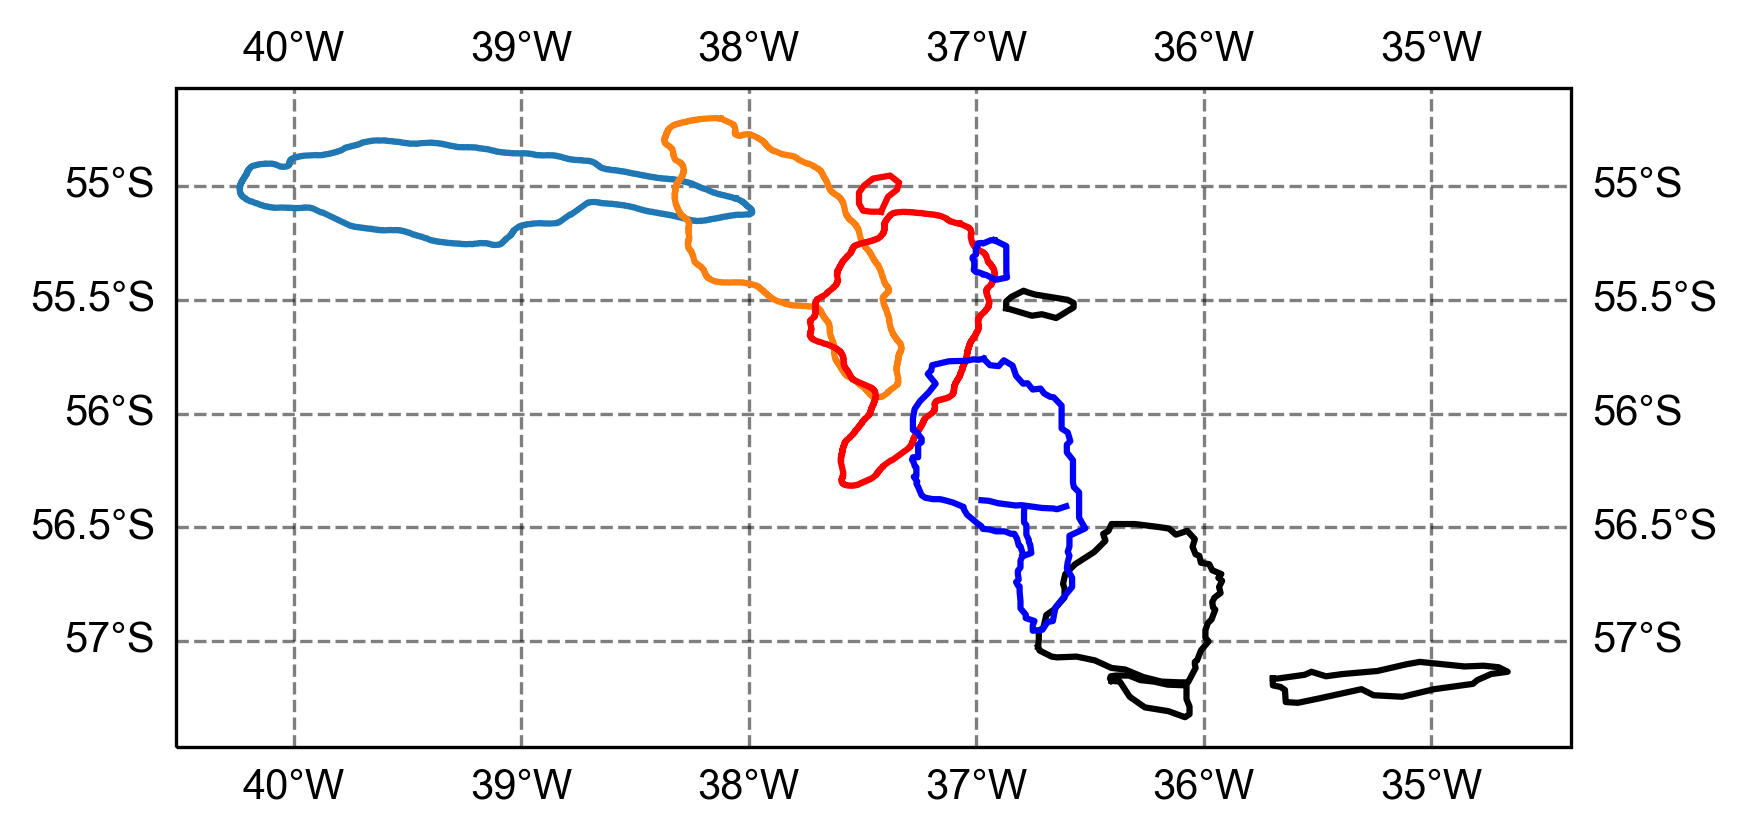

In [9]:
# Plot time series of observed berg positions:

def tup_to_xy(coord):
    c = np.array(coord); c = c.T; y, x = c
    return x,y

fig, ax = plt.subplots(1,1)
ax = plt.axes(projection=ccrs.PlateCarree())

days=np.array([9,14]) #,21,23]) #dec 10,14,17,22
days=days-9 #position of days in the array

for i in days:
    xx,yy=tup_to_xy(outlines[i])
    ax.plot(xx,yy)
    
day17=17-9
xx,yy=tup_to_xy(outlines[day17])
ax.plot(xx,yy,'r')
ax.plot(dec17_break.outline1[0,:],dec17_break.outline1[1,:],'r')
    
ax.plot(dec25.outline1[0,:],dec25.outline1[1,:],'k')
ax.plot(dec25.outline2[0,:],dec25.outline2[1,:],'k')
ax.plot(dec25.outline3[0,:],dec25.outline3[1,:],'k')
ax.plot(dec25.outline4[0,:],dec25.outline4[1,:],'k')

ax.plot(dec21.outline1[0,:],dec21.outline1[1,:],'b')
ax.plot(dec21.outline2b[0,:],dec21.outline2b[1,:],'b')
ax.plot(dec21.crack1[0,:],dec21.crack1[1,:],'b')
ax.plot(dec21.crack2[0,:],dec21.crack2[1,:],'b')

ax.gridlines(color='black',alpha=0.5,linestyle='--',draw_labels=True,x_inline=False, y_inline=False)


#### Create ocean colormaps

In [10]:
keel_depth=-200*(850/1025)

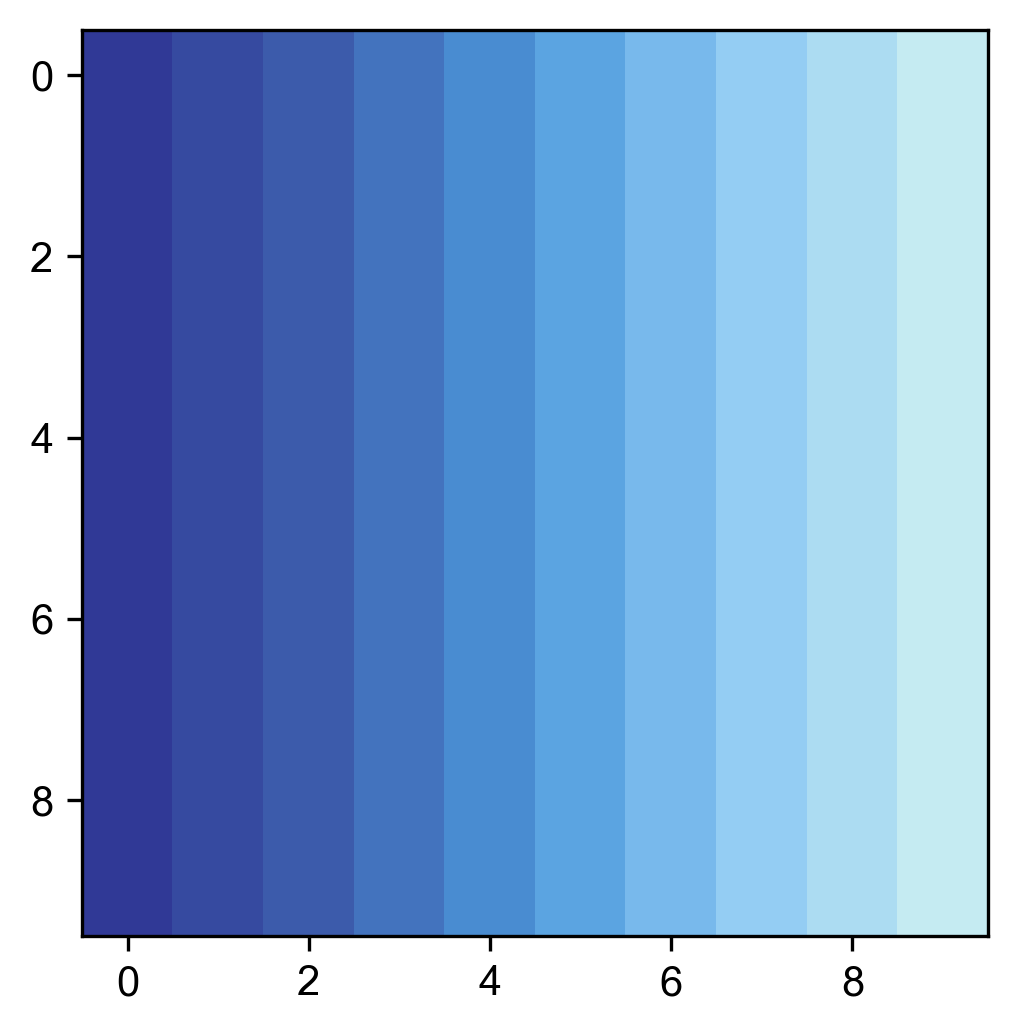

In [12]:
colors = [np.array([48, 57, 150])/255, np.array([62, 96, 175])/255, np.array([77, 154, 220])/255, np.array([142, 201, 244])/255, np.array([197, 235, 242])/255] # first color is black, last is red
ocean_cmap = LinearSegmentedColormap.from_list(
        "Ocean_map", colors)
ocean_cmap.set_bad(color = 'dimgrey', alpha = 1.)
mat = np.indices((10,10))[1]
plt.imshow(mat, cmap=ocean_cmap)
plt.show()

#### Load in OSCAR and bathymetry data

In [13]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio

In [14]:
oscar2=xr.load_dataset(f'{dir}/a68_experiment_ocean_surf_vel_oscar_dec2020_HOURLY_ll_p125.nc')
oscar2['vel']=np.sqrt(oscar2.uo**2 + oscar2.vo**2)
oscar3=oscar2.coarsen(lon=2,lat=2).mean()

In [72]:
bath3=xr.load_dataset(f'{dir}/gebco_for_plots.nc')
nerc_red=xr.load_dataarray(f'{dir}/hogg16_bath_for_plots.nc')

#### Plot bathymetry (mostly Hogg 2016, but also GEBCO 2021 where needed) to confirm it's working

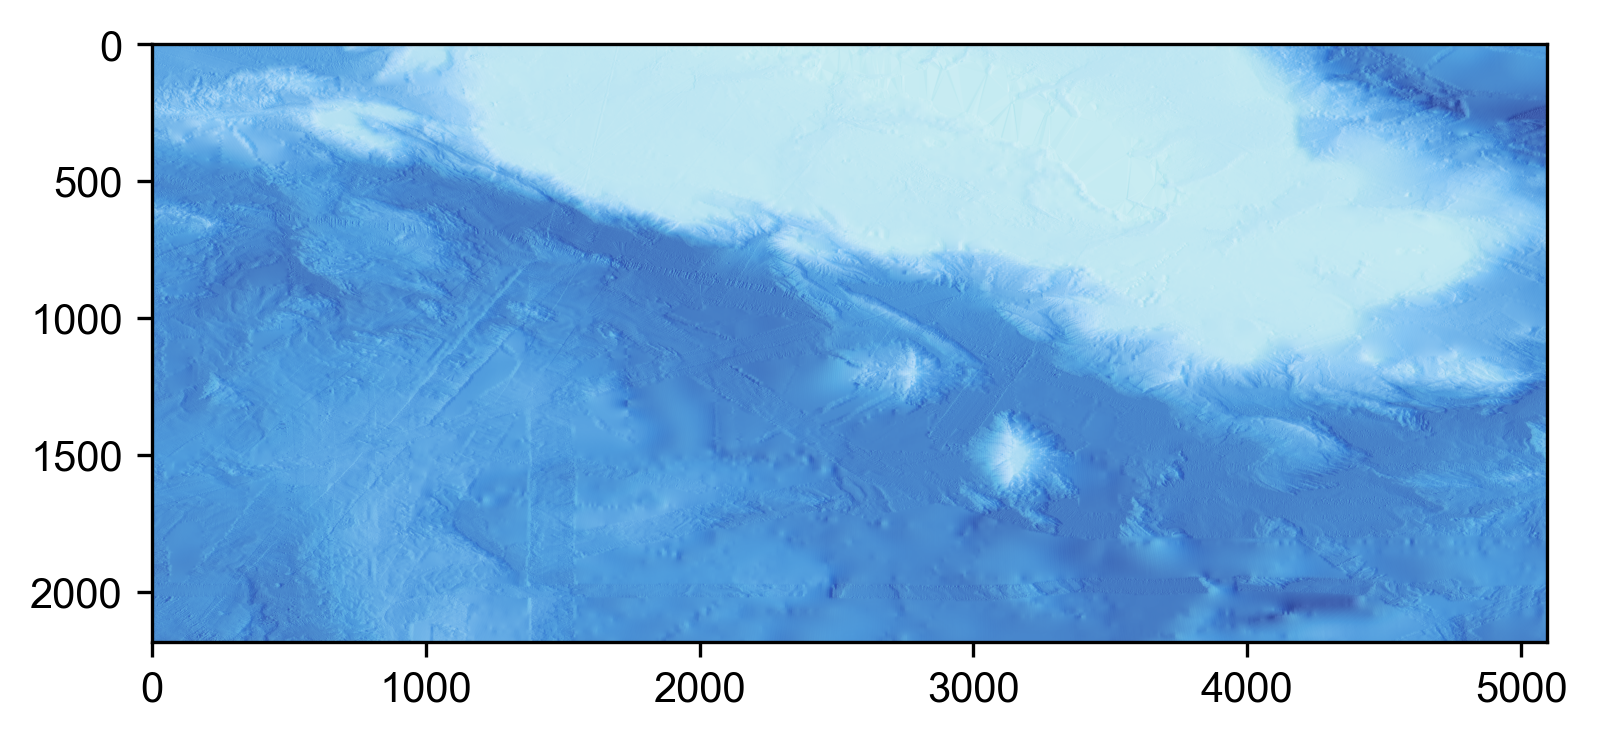

In [21]:
from matplotlib.colors import LightSource

ls = LightSource(azdeg=270, altdeg=5)
zfactor=(0.00001395+0.00001792)/2;
ve=zfactor*5

dx=nerc_red.lon.values[1]-nerc_red.lon.values[0]
dy=nerc_red.lat.values[1]-nerc_red.lat.values[0]
norm = mcolors.Normalize(vmin=-6000,vmax=0)
rgb1 = ls.shade(data=nerc_red.values,dx=dx,dy=dy,cmap=ocean_cmap, vert_exag=ve, blend_mode='overlay',norm=norm,fraction=0.4)

imshow(rgb1)
colorTuple1 = rgb1.reshape((rgb1.shape[0]*rgb1.shape[1],rgb1.shape[2]))



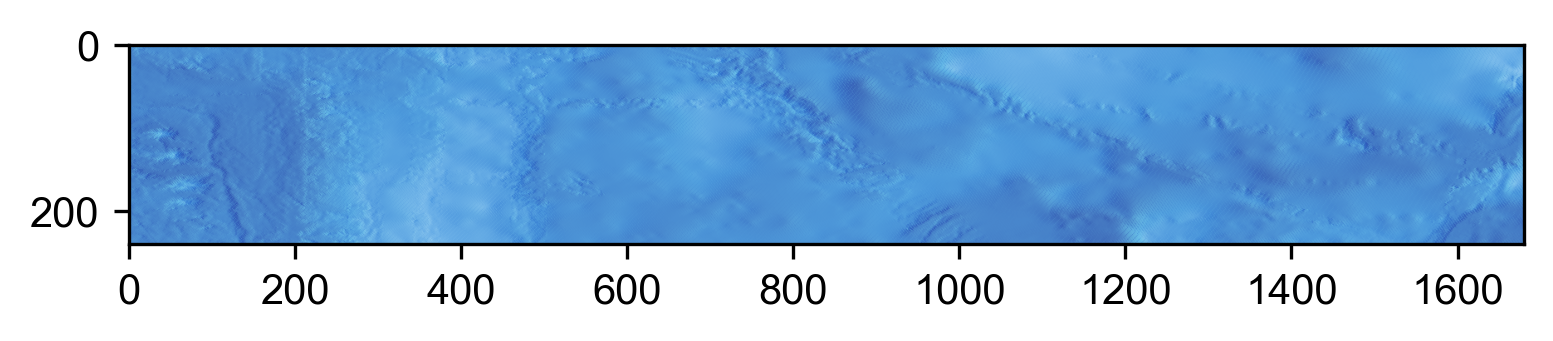

In [23]:
from matplotlib.colors import LightSource
terrain_map = copy.copy(plt.cm.get_cmap("Blues_r"))
terrain_map.set_bad(color = 'gray', alpha = 1.)

ls = LightSource(azdeg=270, altdeg=5)
zfactor=(0.00001395+0.00001792)/2;
ve=zfactor*5


dx=bath3.lon.values[1]-bath3.lon.values[0]
dy=bath3.lat.values[1]-bath3.lat.values[0]
norm = mcolors.Normalize(vmin=-6000,vmax=0)
rgb2 = ls.shade(data=bath3.elevation.values,dx=dx,dy=dy,cmap=ocean_cmap, vert_exag=ve, blend_mode='overlay',norm=norm,fraction=0.4)

imshow(rgb2)

colorTuple2 = rgb2.reshape((rgb2.shape[0]*rgb2.shape[1],rgb2.shape[2]))



### Plot outlines over bathymetry

In [27]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid
import copy as copy

In [28]:
def plotformatting(ax1):
    dir_labels=True
    xticks=[-40, -39, -38, -37, -36, -35]
    yticks=[-57, -56, -55]
    proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax1) - ax1.transData; bound_in_target = proj_to_data.transform_path(boundary_path)
    ax1.set_extent(extent2, crs=ccrs.PlateCarree()); ax1.set_boundary(bound_in_target)
    g=ax1.gridlines(color='black',alpha=0.25,linestyle='--',draw_labels=True,x_inline=False, y_inline=False,xlocs=xticks,ylocs=yticks)
    g.top_labels=False; g.right_labels=False; g.rotate_labels=False
    g.xformatter=LongitudeFormatter(direction_label=dir_labels); g.yformatter=LatitudeFormatter(direction_label=dir_labels)
    g.xlabel_style = {'size': 5, 'color': 'gray'}; g.ylabel_style = {'size': 5, 'color': 'gray'}
    plt.draw()
    for ea in g._labels:
        if not (ea.artist._x<=-170000 or ea.artist._y<=-170000):
            ea.artist._text=''
    return g


In [29]:
xticks=[-40, -39, -38, -37, -36, -35]
yticks=[-57, -56, -55]

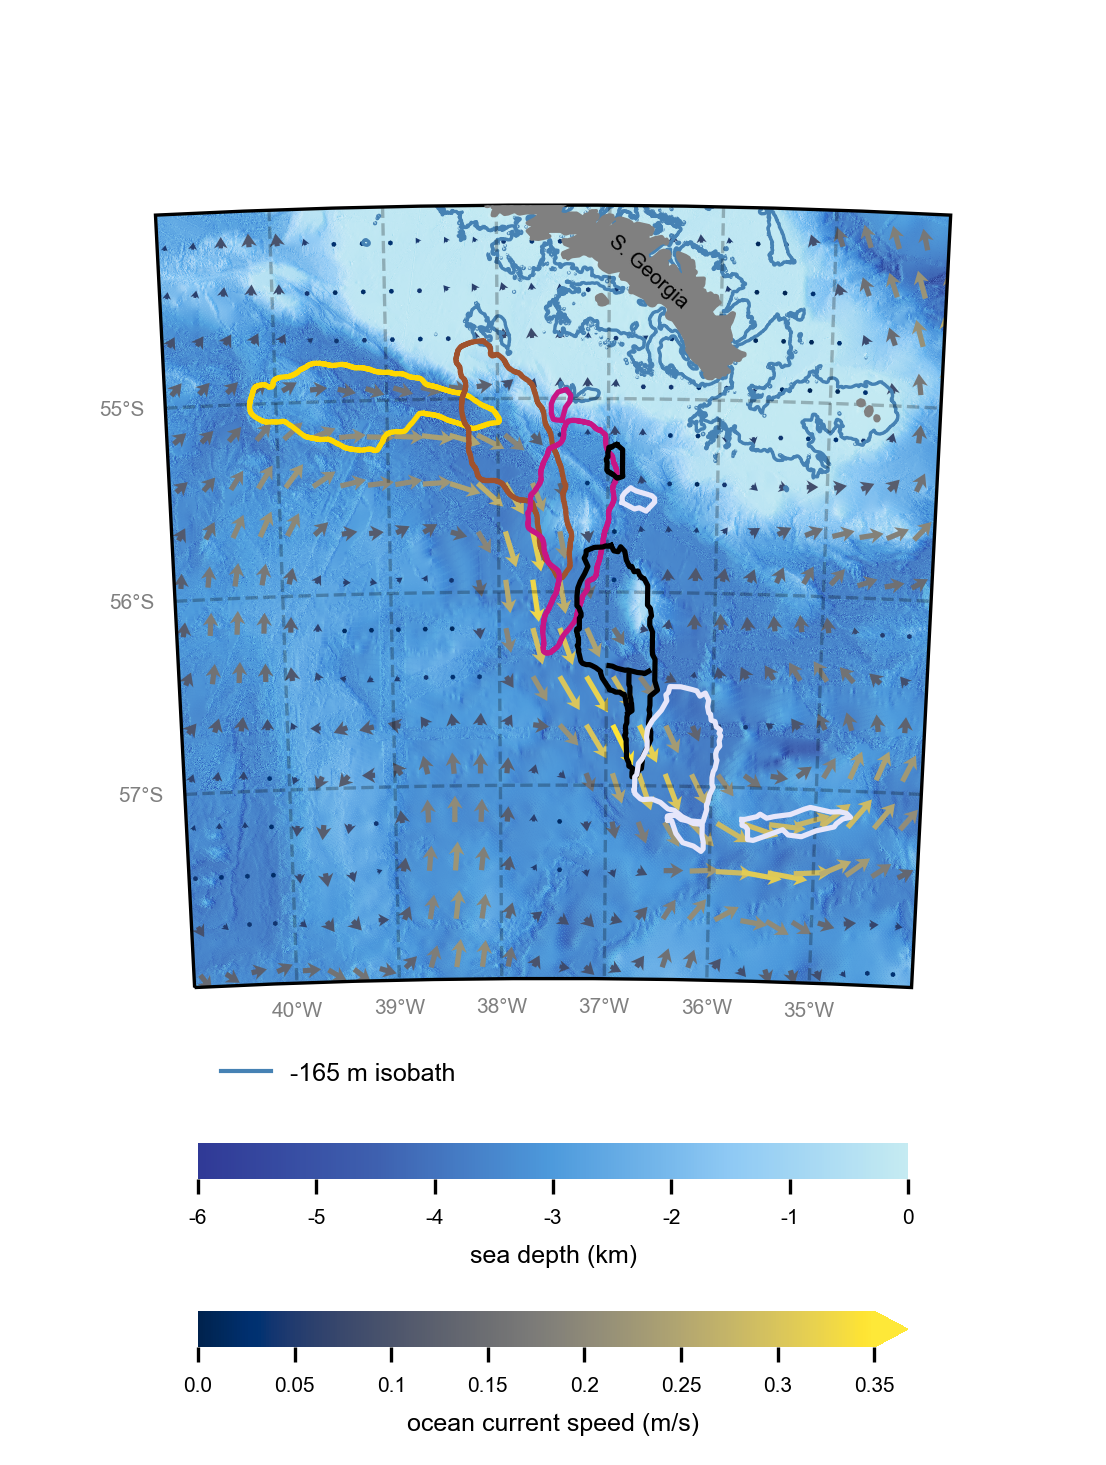

In [30]:
fsize=7; fsize2=6; fsize3=5; ticksize=5
titlesize=fsize; titlepad=-4000

plotall=True

xmin = -41; xmax = -34; ymin = -58; ymax = -54
minlon = xmin; maxlon = xmax; midlon = (minlon+maxlon)/2
minlat = ymin; maxlat = ymax; midlat = (ymin+ymax)/2
extent=[xmin, xmax, ymin, ymax]; extent2=[xmin-1, xmax+1, ymin-1, ymax+1]; extent3=[xmin-1, ymin-1, xmax+1, ymax+1]
subplot_kws=dict(projection=ccrs.NearsidePerspective(central_longitude=midlon, central_latitude=midlat))
bottom_x=np.vstack(np.linspace(minlon,maxlon,10)); bottom_y=bottom_x*0+minlat
top_x=np.vstack(np.linspace(maxlon,minlon,10)); top_y=top_x*0+maxlat
lons=np.vstack((bottom_x,top_x)); lats=np.vstack((bottom_y,top_y))
boundary_path=np.hstack((lons,lats)); boundary_path = mpath.Path(boundary_path)

projection=ccrs.NearsidePerspective(central_longitude=midlon, central_latitude=midlat)
f, axes = plt.subplots(2,2,figsize=(7.1,8),subplot_kw={'projection': projection}); f.tight_layout()

if (plotall):
    BP1=nerc_red.plot(ax=axes[0,0],color=colorTuple1,transform=ccrs.PlateCarree(),rasterized=True,levels=100); BP1.zorder=-100; BP1.colorbar.remove()
    BP2=bath3['elevation'].plot(ax=axes[0,0],color=colorTuple2,transform=ccrs.PlateCarree(),rasterized=True,levels=100); BP2.zorder=-100; BP2.colorbar.remove()
    CS=xr.plot.contour(nerc_red,ax=axes[0,0],levels=[-165.0],colors='steelblue',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=0.8)


ovar=oscar3; otime=360
col=ovar.isel(time=otime).vel.values
cnorm=plt.cm.colors.Normalize(vmin=0,vmax=0.35)
osx=ovar.isel(time=otime).lon.values; osy=ovar.isel(time=otime).lat.values
osuo=ovar.isel(time=otime).uo.values; osvo=ovar.isel(time=otime).vo.values
ocmap='cividis'
if (plotall):
    QR=axes[0,0].quiver(osx,osy,osuo,osvo,col,scale=8,transform=ccrs.PlateCarree(),cmap=ocmap,norm=cnorm,width=0.005, headlength=2.5,headaxislength=2,rasterized=True); QR.zorder=-99

def tup_to_xy(coord):
    c = np.array(coord); c = c.T; y, x = c
    return x,y

day_offset=9; days=np.array([9,14]) #,21,23]) #dec 10,14,17,22
days=days-day_offset #position of days in the array
colors=['gold','sienna']
lw=1.25 #linewidth

for j,i in enumerate(days):
    xx,yy=tup_to_xy(outlines[i])
    axes[0,0].plot(xx,yy,colors[j],linewidth=lw,transform=ccrs.PlateCarree())

c3='mediumvioletred';c4='k';c5='lavender'
day17=17-day_offset
xx,yy=tup_to_xy(outlines[day17])


if (plotall):
    axes[0,0].plot(xx,yy,c3,linewidth=lw,transform=ccrs.PlateCarree())
    axes[0,0].plot(dec17_break.outline1[0,:],dec17_break.outline1[1,:],c3,linewidth=lw,transform=ccrs.PlateCarree())
    axes[0,0].plot(dec21.outline1[0,:],dec21.outline1[1,:],c4,linewidth=lw,transform=ccrs.PlateCarree());axes[0,0].plot(dec21.outline2b[0,:],dec21.outline2b[1,:],c4,linewidth=lw,transform=ccrs.PlateCarree());axes[0,0].plot(dec21.crack1[0,:],dec21.crack1[1,:],c4,linewidth=lw,transform=ccrs.PlateCarree());axes[0,0].plot(dec21.crack2[0,:],dec21.crack2[1,:],c4,linewidth=lw,transform=ccrs.PlateCarree())
    axes[0,0].plot(dec25.outline1[0,:],dec25.outline1[1,:],c5,linewidth=lw,transform=ccrs.PlateCarree()); axes[0,0].plot(dec25.outline2[0,:],dec25.outline2[1,:],c5,linewidth=lw,transform=ccrs.PlateCarree()); axes[0,0].plot(dec25.outline3[0,:],dec25.outline3[1,:],c5,linewidth=lw,transform=ccrs.PlateCarree()); axes[0,0].plot(dec25.outline4[0,:],dec25.outline4[1,:],c5,linewidth=lw,transform=ccrs.PlateCarree())


g=plotformatting(axes[0,0])

axes[0,0].add_feature(cart.feature.LAND, zorder=100, edgecolor='gray', facecolor='gray')
axes[0,0].text(x=-37.035, y=-54.53, s='S. Georgia', rotation=-42, fontsize=fsize3, transform=ccrs.PlateCarree(), zorder=1000)


plt.tight_layout()

f.subplots_adjust(hspace=-0.3,wspace=-0.05)

ww=0.4-0.4*(1/6)

cbar_ax = f.add_axes([0.1, .46, ww, 0.015]) #right, up, width, height
norm = mcolors.Normalize(vmin=-6000,vmax=0)
clb=f.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=ocean_cmap),cax=cbar_ax,orientation='horizontal')
clb.outline.set_visible(False)
xl=clb.ax.set_xlabel('sea depth (km)',fontsize=fsize2)
clb.ax.tick_params(labelsize=ticksize)
clb.set_ticks([0.0,-1e3,-2e3,-3e3,-4e3,-5e3,-6e3])
clb.set_ticklabels([0,-1,-2,-3,-4,-5,-6])

cbar_ax2 = f.add_axes([0.1, .39, ww, 0.015]) #right, up, width, height
clb2=f.colorbar(plt.cm.ScalarMappable(norm=cnorm, cmap=ocmap), cax=cbar_ax2, extend='max',orientation='horizontal')
clb2.outline.set_visible(False)
xl2=clb2.ax.set_xlabel('ocean current speed (m/s)',fontsize=fsize2)
clb2.ax.tick_params(labelsize=ticksize)
clb2.set_ticks([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35])
clb2.set_ticklabels([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35])

axes[0,1].set_visible(False)
axes[1,0].set_visible(False)
axes[1,1].set_visible(False)

legend_elements = [Line2D([0], [0], color='steelblue', lw=1, label='-165 m isobath')]
f.legend(handles=legend_elements,loc='lower left', frameon=False, fontsize=fsize2, bbox_to_anchor=(0.1,0.49))


## Plot snapshot trajectories

In [34]:
#timesteps of oscar for next plots
dec9_1PM=360-7*24+13
dec16 = 360
dec17 = dec16+24*1
dec19 = dec16+24*3
dec20 = dec16+24*4

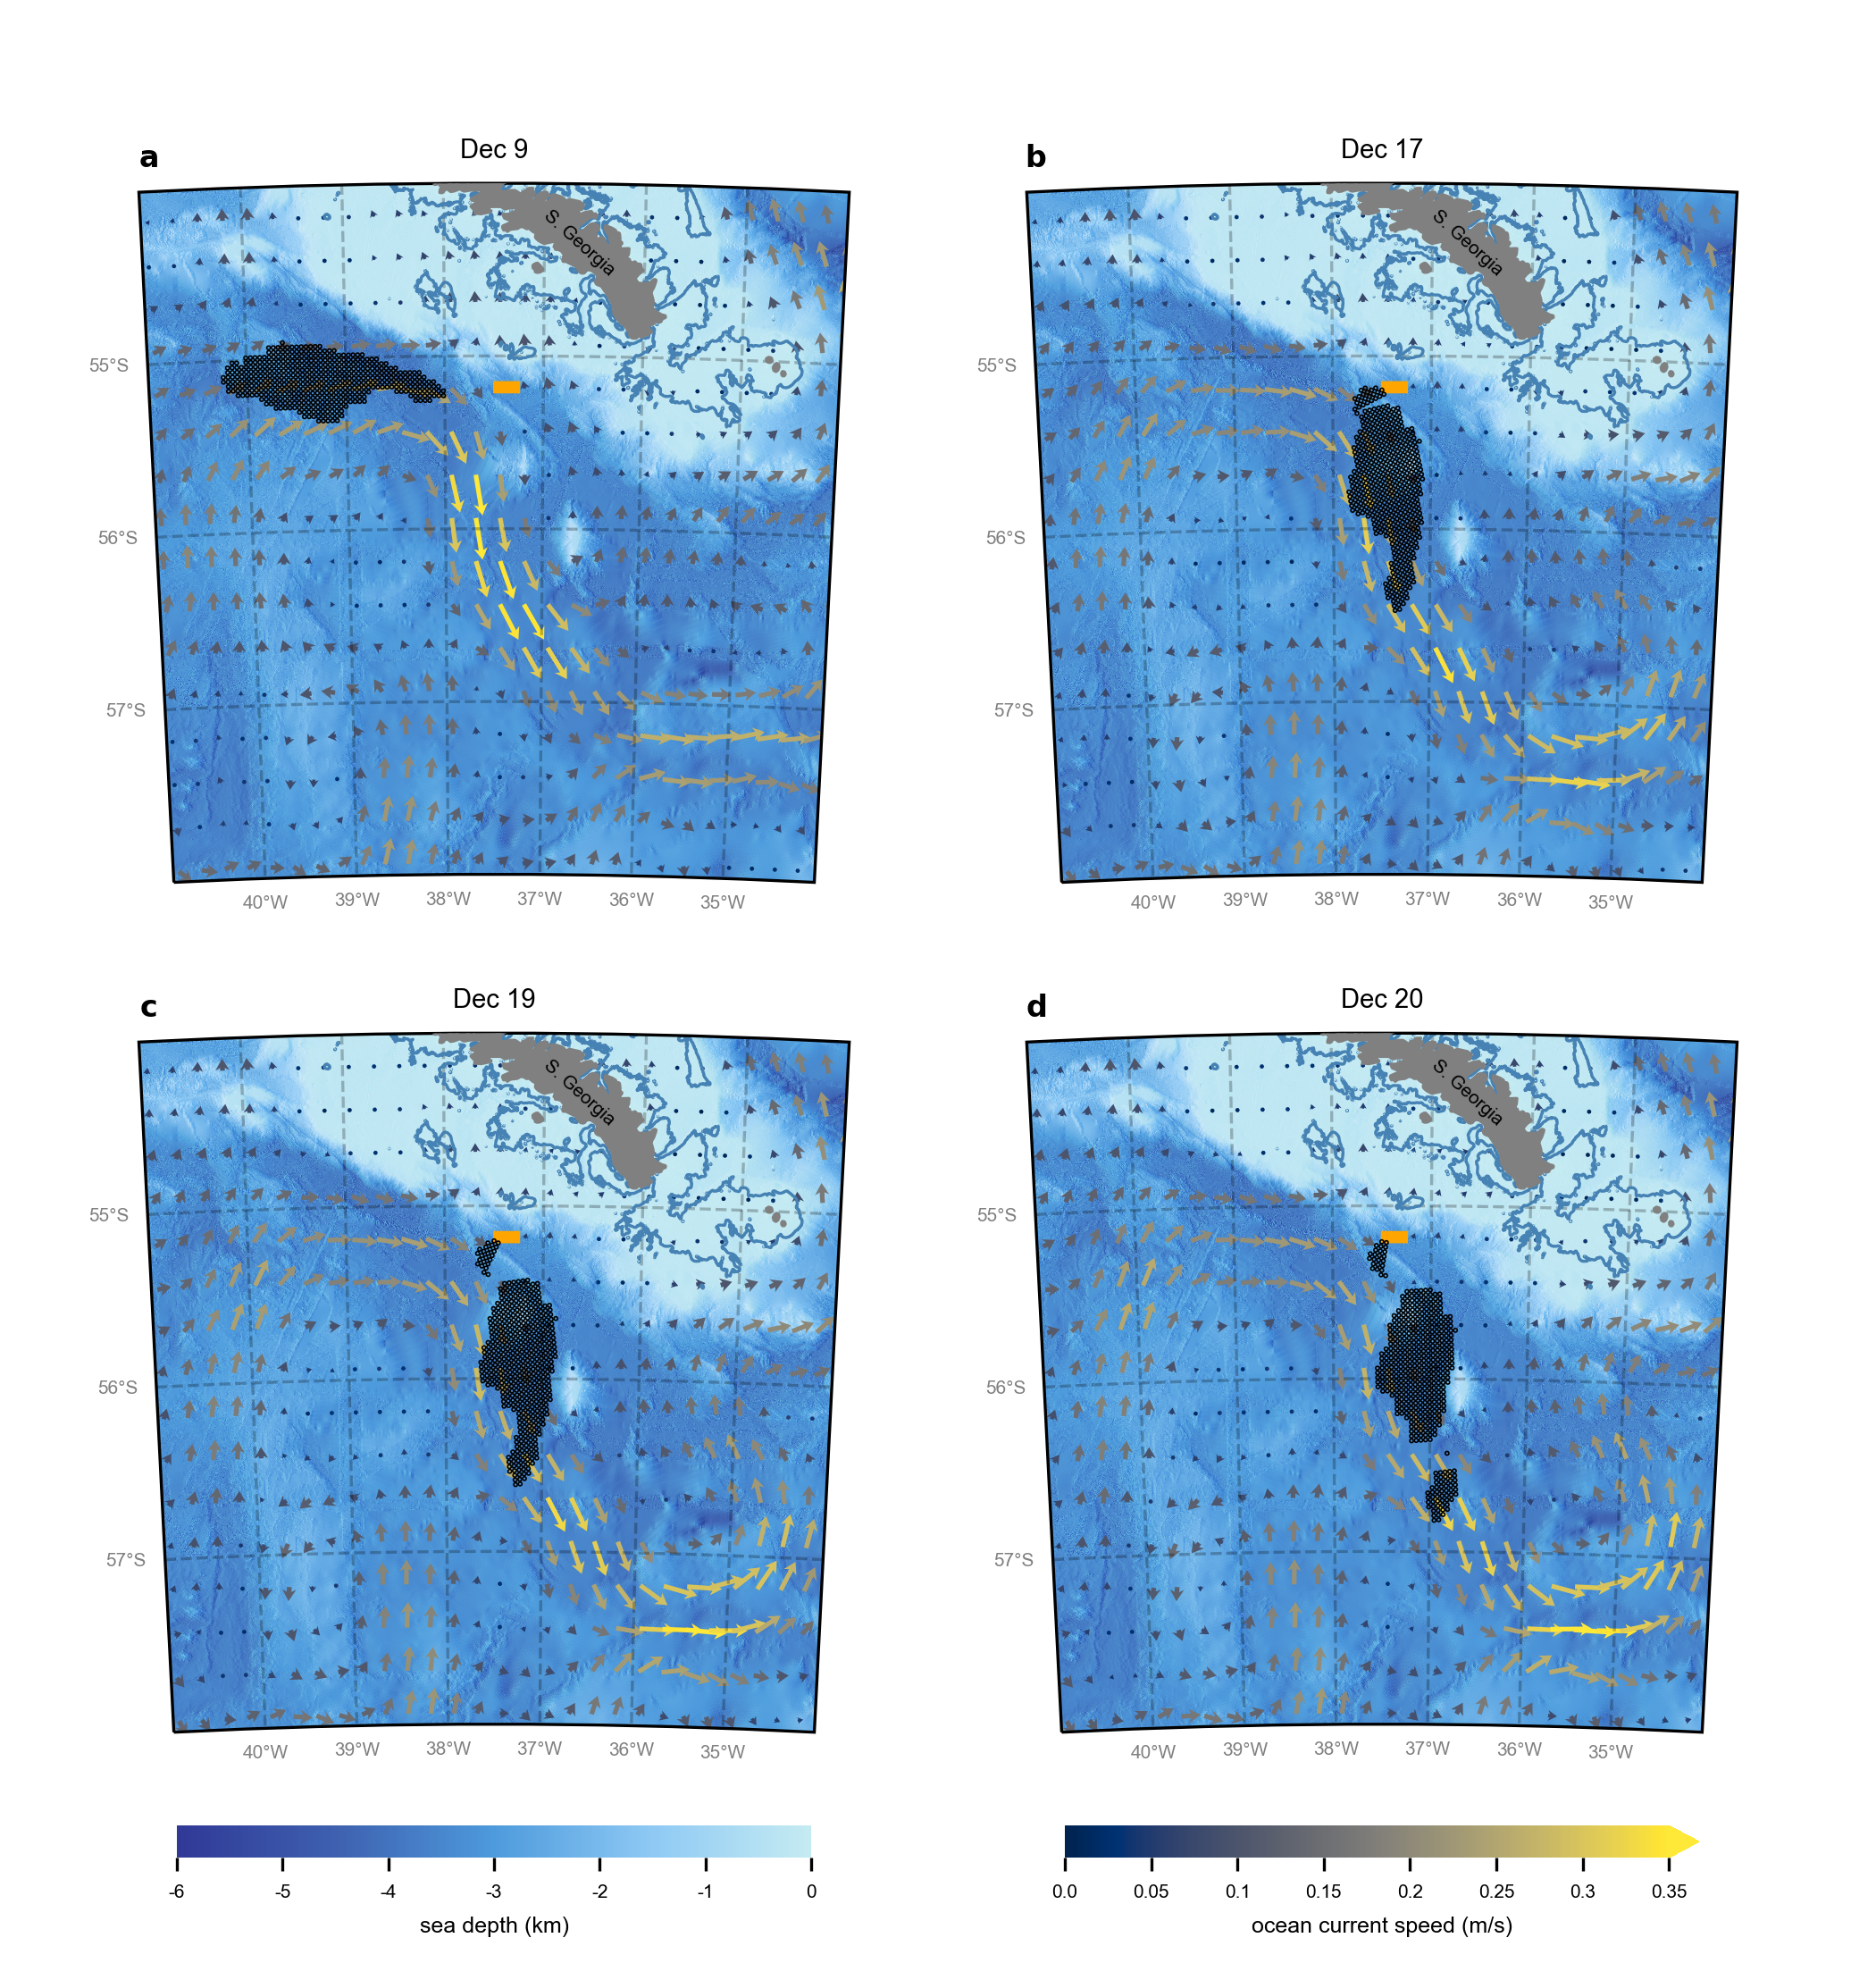

In [58]:
#SNAPSHOT TRAJECTORIES

#Model results:
filename=f'{dir}/longrun_od_17.8_tn_ng_ydn.1_ss90_ns18_rx-37.51_ry-55.2166.nc'

thefont='Arial'
psize=10000
plot_all=True

#text sizes
fsize=7; fsize2=6; fsize3=5; ticksize=5
titlesize=8; titlepad=-4000

with nc.Dataset(filename) as file:
    x = file.variables['lon'][:]-360
    y = file.variables['lat'][:]
    day = file.variables['day'][:]
    length = file.variables['length'][:]
    width = file.variables['width'][:]
    thick = file.variables['thickness'][:]
    od = file.variables['od'][:]


start_time=9+13./24
end_time=24
day=day+start_time;
x=x[np.where(day<end_time)]
y=y[np.where(day<end_time)]
length=length[np.where(day<end_time)]
width=width[np.where(day<end_time)]
thick=thick[np.where(day<end_time)]
od=od[np.where(day<end_time)]
day=day[np.where(day<end_time)]

ud = np.unique(day); t = ud[0]
radius = np.sqrt(length*width/4)

#OSCAR data
#otime=360 is the 16th!
ovar=oscar3; otime=360; ocmap='cividis'
cnorm=plt.cm.colors.Normalize(vmin=0,vmax=0.35)
col=ovar.isel(time=otime).vel.values
osx=ovar.isel(time=otime).lon.values; osy=ovar.isel(time=otime).lat.values
osuo=ovar.isel(time=otime).uo.values; osvo=ovar.isel(time=otime).vo.values

def get_oscar_on_timestep(otime):
    col=ovar.isel(time=otime).vel.values
    osx=ovar.isel(time=otime).lon.values; osy=ovar.isel(time=otime).lat.values
    osuo=ovar.isel(time=otime).uo.values; osvo=ovar.isel(time=otime).vo.values
    return col,osx,osy,osuo,osvo


#(rectangular) grounding zone
xw=322.94692-322.67292; yw=-54.93958-(-55.01042); #widths
xc=-37.51; yc=-55.2166 #lower left corder
rect_c='orange' #color

theday=[min(day),17,19,20.5]

xmin = -41; xmax = -34; ymin = -58; ymax = -54
minlon = xmin; maxlon = xmax; midlon = (minlon+maxlon)/2
minlat = ymin; maxlat = ymax; midlat = (ymin+ymax)/2
extent=[xmin, xmax, ymin, ymax]; extent2=[xmin-1, xmax+1, ymin-1, ymax+1]; extent3=[xmin-1, ymin-1, xmax+1, ymax+1]
subplot_kws=dict(projection=ccrs.NearsidePerspective(central_longitude=midlon, central_latitude=midlat))
bottom_x=np.vstack(np.linspace(minlon,maxlon,10)); bottom_y=bottom_x*0+minlat
top_x=np.vstack(np.linspace(maxlon,minlon,10)); top_y=top_x*0+maxlat
lons=np.vstack((bottom_x,top_x)); lats=np.vstack((bottom_y,top_y))
boundary_path=np.hstack((lons,lats)); boundary_path = mpath.Path(boundary_path)

projection=ccrs.NearsidePerspective(central_longitude=midlon, central_latitude=midlat)
f, axes = plt.subplots(2,2,figsize=(7.1,8),subplot_kw={'projection': projection}); f.tight_layout()


for i in list(range(2)):
    for j in list(range(2)):
        axes[i,j].add_feature(cart.feature.LAND, zorder=100, edgecolor='gray', facecolor='gray')
        axes[i,j].text(x=-37.035, y=-54.53, s='S. Georgia', rotation=-42, fontsize=fsize3, transform=ccrs.PlateCarree(), zorder=1000)

g_00=plotformatting(axes[0,0])
g_01=plotformatting(axes[0,1]); 
g_10=plotformatting(axes[1,0]); 
g_11=plotformatting(axes[1,1]); 

if plot_all:
    [col,osx,osy,osuo,osvo]=get_oscar_on_timestep(dec9_1PM)
    BP1_00=nerc_red.plot(ax=axes[0,0],color=colorTuple1,transform=ccrs.PlateCarree(),rasterized=True,levels=100,zorder=-100); BP1_00.colorbar.remove()
    BP2_00=bath3['elevation'].plot(ax=axes[0,0],color=colorTuple2,transform=ccrs.PlateCarree(),rasterized=True,levels=100,zorder=-100); BP2_00.colorbar.remove()
    CS_00=xr.plot.contour(nerc_red,ax=axes[0,0],levels=[-165.0,1e6],colors='steelblue',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=0.8)
    QR_00=axes[0,0].quiver(osx,osy,osuo,osvo,col,scale=8,transform=ccrs.PlateCarree(),cmap=ocmap,norm=cnorm,width=0.005, headlength=2.5,headaxislength=2,rasterized=True); QR_00.zorder=-99 
    rect_00=mpatches.Rectangle((xc,yc),xw,yw,fill = True,color = rect_c,linewidth = 0,transform=ccrs.PlateCarree())
    r_00=axes[0,0].add_patch(rect_00)
    td=0; x1 = x[day == theday[td]]; y1 = y[day == theday[td]]; data = np.hstack((x1[:,np.newaxis],y1[:,np.newaxis]))
    scat_00 = axes[0,0].scatter([],[],transform=ccrs.PlateCarree(),marker='o',zorder=100); scat_00.set_offsets(data)
    rad_00 = radius[day == theday[td]]; scat_00.set_sizes(rad_00/psize); scat_00.set_color("none"); scat_00.set_edgecolor("k")

    [col,osx,osy,osuo,osvo]=get_oscar_on_timestep(dec17)
    BP1_01=nerc_red.plot(ax=axes[0,1],color=colorTuple1,transform=ccrs.PlateCarree(),rasterized=True,levels=100,zorder=-100); BP1_01.colorbar.remove()
    BP2_01=bath3['elevation'].plot(ax=axes[0,1],color=colorTuple2,transform=ccrs.PlateCarree(),rasterized=True,levels=100,zorder=-100); BP2_01.colorbar.remove()
    CS_01=xr.plot.contour(nerc_red,ax=axes[0,1],levels=[-165.0,1e6],colors='steelblue',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=0.8)
    QR_01=axes[0,1].quiver(osx,osy,osuo,osvo,col,scale=8,transform=ccrs.PlateCarree(),cmap=ocmap,norm=cnorm,width=0.005, headlength=2.5,headaxislength=2,rasterized=True); QR_01.zorder=-99
    rect_01=mpatches.Rectangle((xc,yc),xw,yw,fill = True,color = rect_c,linewidth = 0,transform=ccrs.PlateCarree())
    r_01=axes[0,1].add_patch(rect_01)
    td=1; x1 = x[day == theday[td]]; y1 = y[day == theday[td]]; data = np.hstack((x1[:,np.newaxis],y1[:,np.newaxis]))
    scat_01 = axes[0,1].scatter([],[],transform=ccrs.PlateCarree(),marker='o',zorder=100); scat_01.set_offsets(data)
    rad_01 = radius[day == theday[td]]; scat_01.set_sizes(rad_01/psize); scat_01.set_color("none"); scat_01.set_edgecolor("k")

    [col,osx,osy,osuo,osvo]=get_oscar_on_timestep(dec19)
    BP1_10=nerc_red.plot(ax=axes[1,0],color=colorTuple1,transform=ccrs.PlateCarree(),rasterized=True,levels=100,zorder=-100); BP1_10.colorbar.remove()
    BP2_10=bath3['elevation'].plot(ax=axes[1,0],color=colorTuple2,transform=ccrs.PlateCarree(),rasterized=True,levels=100,zorder=-100); BP2_10.colorbar.remove()
    CS_10=xr.plot.contour(nerc_red,ax=axes[1,0],levels=[-165.0,1e6],colors='steelblue',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=0.8)
    QR_10=axes[1,0].quiver(osx,osy,osuo,osvo,col,scale=8,transform=ccrs.PlateCarree(),cmap=ocmap,norm=cnorm,width=0.005, headlength=2.5,headaxislength=2,rasterized=True); QR_10.zorder=-99
    rect_10=mpatches.Rectangle((xc,yc),xw,yw,fill = True,color = rect_c,linewidth = 0,transform=ccrs.PlateCarree())
    r_10=axes[1,0].add_patch(rect_10)
    td=2; x1 = x[day == theday[td]]; y1 = y[day == theday[td]]; data = np.hstack((x1[:,np.newaxis],y1[:,np.newaxis]))
    scat_10 = axes[1,0].scatter([],[],transform=ccrs.PlateCarree(),marker='o',zorder=100); scat_10.set_offsets(data)
    rad_10 = radius[day == theday[td]]; scat_10.set_sizes(rad_10/psize); scat_10.set_color("none"); scat_10.set_edgecolor("k")

    [col,osx,osy,osuo,osvo]=get_oscar_on_timestep(dec20)
    BP1_11=nerc_red.plot(ax=axes[1,1],color=colorTuple1,transform=ccrs.PlateCarree(),rasterized=True,levels=100); BP1_11.zorder=-100; BP1_11.colorbar.remove()
    BP2_11=bath3['elevation'].plot(ax=axes[1,1],color=colorTuple2,transform=ccrs.PlateCarree(),rasterized=True,levels=100); BP2_11.zorder=-100; BP2_11.colorbar.remove()
    CS_11=xr.plot.contour(nerc_red,ax=axes[1,1],levels=[-165.0],colors='steelblue',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=0.8)
    QR_11=axes[1,1].quiver(osx,osy,osuo,osvo,col,scale=8,transform=ccrs.PlateCarree(),cmap=ocmap,norm=cnorm,width=0.005, headlength=2.5,headaxislength=2,rasterized=True); QR_11.zorder=-99
    rect_11=mpatches.Rectangle((xc,yc),xw,yw,fill = True,color = rect_c,linewidth = 0,transform=ccrs.PlateCarree())
    r_11=axes[1,1].add_patch(rect_11)
    td=3; x1 = x[day == theday[td]]; y1 = y[day == theday[td]]; data = np.hstack((x1[:,np.newaxis],y1[:,np.newaxis]))
    scat_11 = axes[1,1].scatter([],[],transform=ccrs.PlateCarree(),marker='o',zorder=100); scat_11.set_offsets(data)
    rad_11 = radius[day == theday[td]]; scat_11.set_sizes(rad_11/psize); scat_11.set_color("none"); scat_11.set_edgecolor("k")

    
axes[0,0].text(s=r"$\bf{a}$",ha='center',x=-40.9,y=-53.85,transform=ccrs.PlateCarree(),fontsize=titlesize,family=thefont)
axes[0,1].text(s=r"$\bf{b}$",ha='center',x=-40.9,y=-53.85,transform=ccrs.PlateCarree(),fontsize=titlesize,family=thefont)
axes[1,0].text(s=r"$\bf{c}$",ha='center',x=-40.9,y=-53.85,transform=ccrs.PlateCarree(),fontsize=titlesize,family=thefont)
axes[1,1].text(s=r"$\bf{d}$",ha='center',x=-40.9,y=-53.85,transform=ccrs.PlateCarree(),fontsize=titlesize,family=thefont)

axes[0,0].text(s='Dec 9', ha='center',x=-37.5,y=-53.85,transform=ccrs.PlateCarree(),fontsize=fsize,family=thefont)
axes[0,1].text(s='Dec 17',ha='center',x=-37.5,y=-53.85,transform=ccrs.PlateCarree(),fontsize=fsize,family=thefont)
axes[1,0].text(s='Dec 19',ha='center',x=-37.5,y=-53.85,transform=ccrs.PlateCarree(),fontsize=fsize,family=thefont)
axes[1,1].text(s='Dec 20',ha='center',x=-37.5,y=-53.85,transform=ccrs.PlateCarree(),fontsize=fsize,family=thefont)

plt.tight_layout()

f.subplots_adjust(hspace=-0.3,wspace=-0.05)

ww=0.4-0.4*(1/6)
xx2=0.5+0.4*(1/6)
cbar_ax = f.add_axes([0.1, 0.085, ww, 0.015]) #right, up, width, height
norm = mcolors.Normalize(vmin=-6000,vmax=0)
clb=f.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=ocean_cmap),cax=cbar_ax,orientation='horizontal')
clb.outline.set_visible(False)
xl=clb.ax.set_xlabel('sea depth (km)',fontsize=fsize2)
clb.ax.tick_params(labelsize=ticksize)
clb.set_ticks([0.0,-1e3,-2e3,-3e3,-4e3,-5e3,-6e3])
clb.set_ticklabels([0,-1,-2,-3,-4,-5,-6])

cbar_ax2 = f.add_axes([xx2, 0.085, ww, 0.015]) #right, up, width, height
clb2=f.colorbar(plt.cm.ScalarMappable(norm=cnorm, cmap=ocmap), cax=cbar_ax2, extend='max',orientation='horizontal') 
xl2=clb2.ax.set_xlabel('ocean current speed (m/s)',fontsize=fsize2)
clb2.outline.set_visible(False)
clb2.ax.tick_params(labelsize=ticksize)
clb2.set_ticks([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35])
clb2.set_ticklabels([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35])

## Animation

In [59]:
#animated trajectories:

#Model results:
filename=f'{dir}/longrun_od_17.8_tn_ng_ydn.1_ss90_ns18_rx-37.51_ry-55.2166.nc'

psize=850

with nc.Dataset(filename) as file:
    x = file.variables['lon'][:]-360
    y = file.variables['lat'][:]
    day = file.variables['day'][:]
    length = file.variables['length'][:]
    width = file.variables['width'][:]
    thick = file.variables['thickness'][:]
    od = file.variables['od'][:]

start_time=9+13./24 #day of december
end_time=24
day=day+start_time;
x=x[np.where(day<end_time)]
y=y[np.where(day<end_time)]
length=length[np.where(day<end_time)]
width=width[np.where(day<end_time)]
thick=thick[np.where(day<end_time)]
od=od[np.where(day<end_time)]
day=day[np.where(day<end_time)]

ud = np.unique(day); t = ud[0]
sd0=np.floor(ud)
st0=24*(ud-sd0)


radius = np.sqrt(length*width/4)

xmin = -41
xmax = -34
ymin = -58
ymax = -54

minlon = xmin
maxlon = xmax
midlon = (minlon+maxlon)/2

minlat = ymin
maxlat = ymax
midlat = (ymin+ymax)/2

extent=[xmin, xmax, ymin, ymax]
extent2=[xmin-1, xmax+1, ymin-1, ymax+1]
extent3=[xmin-1, ymin-1, xmax+1, ymax+1]

subplot_kws=dict(projection=ccrs.NearsidePerspective(central_longitude=midlon, central_latitude=midlat))

bottom_x=np.vstack(np.linspace(minlon,maxlon,3)); bottom_y=bottom_x*0+minlat
top_x=np.vstack(np.linspace(maxlon,minlon,3)); top_y=top_x*0+maxlat
lons=np.vstack((bottom_x,top_x)); lats=np.vstack((bottom_y,top_y))
boundary_path=np.hstack((lons,lats))
boundary_path = mpath.Path(boundary_path)


#for determining if grounded:
rho_bergs=850.; rho_seawater=1025.
h_to_ground=25.
draught=(rho_bergs/rho_seawater)*thick
groundfrac=1.-(od-draught)/h_to_ground
groundfrac[groundfrac<0.]=0.; groundfrac[groundfrac>1.]=1.

# frame info
num_frames = len(ud)
movie_len = 5 #seconds
frame_len = movie_len/num_frames #/1000
    
# Now we can do the plotting!
f = plt.figure(figsize=(8,8))
f.tight_layout()

ax1 = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=midlon, central_latitude=midlat))

r1=radius[day==ud[0]][0]
scatsize=r1/psize

scat = ax1.scatter([],[],transform=ccrs.PlateCarree(),marker='o',zorder=200,c='k',edgecolor='k',s=scatsize) #,edgecolor='red')

time_text = ax1.text(0.05, 0.9, '', transform=ax1.transAxes,size=12)

plt.tight_layout()

ovar=oscar3
otime=360-7*24+13
col=ovar.isel(time=otime).vel.values
norm=plt.cm.colors.Normalize(vmin=0,vmax=0.35)
osx=ovar.isel(time=otime).lon.values
osy=ovar.isel(time=otime).lat.values
osuo=ovar.isel(time=otime).uo.values
osvo=ovar.isel(time=otime).vo.values
ocmap='cividis'
QR=ax1.quiver(osx,osy,osuo*0,osvo*0,col*0,scale=8,transform=ccrs.PlateCarree(),cmap=ocmap,norm=norm, 
           width=0.005, headlength=2.5,headaxislength=2,rasterized=True)
QR.zorder=-99


def animate(i):

    x1 = x[day == ud[i]]; y1 = y[day == ud[i]]

    scat.set_offsets(np.hstack((x1[:,np.newaxis],y1[:,np.newaxis])))

    sd=int(sd0[i])
    st=int(round(st0[i]))

    time_text.set_text('Dec %i' % sd)

    print('time',sd,st)

    otime=360-7*24+13+i
    col=ovar.isel(time=otime).vel.values
    osuo=ovar.isel(time=otime).uo.values
    osvo=ovar.isel(time=otime).vo.values    
    QR.set_UVC(osuo,osvo,col)

    return scat,QR,time_text

print('definit')
def init():
    scat.set_offsets([])
    return scat,QR,

print('start ani')
ani = animation.FuncAnimation(
    f,animate,init_func=init,frames=num_frames,
    interval=frame_len,blit=True) #,repeat=True)


print('end ani')

norm = mcolors.Normalize(vmin=-6000,vmax=0)

BP1=nerc_red.plot(ax=ax1,color=colorTuple1,transform=ccrs.PlateCarree(),rasterized=True,levels=100)
BP1.zorder=-100
BP1.colorbar.remove()
BP2=bath3['elevation'].plot(ax=ax1,color=colorTuple2,transform=ccrs.PlateCarree(),rasterized=True)
BP2.zorder=-100
BP2.colorbar.remove()
CS=xr.plot.contour(nerc_red,ax=ax1,levels=[-165],colors='steelblue',transform=ccrs.PlateCarree(),linestyles='solid',linewidths=1)


ax1.add_feature(cart.feature.LAND, zorder=100, edgecolor='gray', facecolor='gray')

ax1.text(x=-37.035, y=-54.56, s='S. Georgia', rotation=-42, fontsize=10, transform=ccrs.PlateCarree(), zorder=1000)

norm=plt.cm.colors.Normalize(vmin=0,vmax=0.35)

clb2=f.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=ocmap),ax=ax1, shrink=0.38, pad=-0.025)
clb2.ax.tick_params(labelsize=12)
clb2.ax.set_xlabel('\n      surface ocean   \n   current speed (m/s)',fontsize=12)


xw=322.94692-322.67292; yw=-54.93958-(-55.01042); #widths
xc=-37.51; yc=-55.2166 #lower left corder

rect_c='orange'

rect=mpatches.Rectangle((xc,yc),xw,yw,fill = True,color = rect_c,linewidth = 0,transform=ccrs.PlateCarree())
ax1.add_patch(rect)
legend_elements = [mpatches.Patch(color=rect_c, label='grounding \n zone')]
ax1.legend(handles=legend_elements,loc='upper right', bbox_to_anchor=(1.15,0.8), frameon=False, fontsize=12)


xticks=list(range(minlon,maxlon+1)); yticks=list(range(minlat,maxlat+1))
dir_labels=True
proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax1) - ax1.transData
bound_in_target = proj_to_data.transform_path(boundary_path)
ax1.set_extent(extent2, crs=ccrs.PlateCarree())
ax1.set_boundary(bound_in_target)
g=ax1.gridlines(color='black',alpha=0.5,linestyle='--',draw_labels=True,x_inline=False, y_inline=False,xlocs=xticks,ylocs=yticks)
g.top_labels=False; g.right_labels=False; g.rotate_labels=False
g.xformatter=LongitudeFormatter(direction_label=dir_labels); g.yformatter=LatitudeFormatter(direction_label=dir_labels)
g.xlabel_style = {'size': 12, 'color': 'gray'}; g.ylabel_style = {'size': 12, 'color': 'gray'}


plt.close(ani._fig)

ani.save('a68a_modeled.mp4',writer='imagemagick')
Video('a68a_modeled.mp4')


definit
start ani
end ani
time 9 13
time 9 14
time 9 15
time 9 16
time 9 17
time 9 18
time 9 19
time 9 20
time 9 21
time 9 22
time 9 23
time 10 0
time 10 1
time 10 2
time 10 3
time 10 4
time 10 5
time 10 6
time 10 7
time 10 8
time 10 9
time 10 10
time 10 11
time 10 12
time 10 13
time 10 14
time 10 15
time 10 16
time 10 17
time 10 18
time 10 19
time 10 20
time 10 21
time 10 22
time 10 23
time 11 0
time 11 1
time 11 2
time 11 3
time 11 4
time 11 5
time 11 6
time 11 7
time 11 8
time 11 9
time 11 10
time 11 11
time 11 12
time 11 13
time 11 14
time 11 15
time 11 16
time 11 17
time 11 18
time 11 19
time 11 20
time 11 21
time 11 22
time 11 23
time 12 0
time 12 1
time 12 2
time 12 3
time 12 4
time 12 5
time 12 6
time 12 7
time 12 8
time 12 9
time 12 10
time 12 11
time 12 12
time 12 13
time 12 14
time 12 15
time 12 16
time 12 17
time 12 18
time 12 19
time 12 20
time 12 21
time 12 22
time 12 23
time 13 0
time 13 1
time 13 2
time 13 3
time 13 4
time 13 5
time 13 6
time 13 7
time 13 8
time 13 9
ti

In [43]:
#convert video pixel format, if needed

#ffmpeg -i a68a_modeled.mp4 -pix_fmt yuv420p a68a_modeled_yuv420p.mp4